In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.4f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

# 10.5.1 K-Means Clustering

In [2]:
np.random.seed(42)

x = np.random.normal(size=50*2).reshape(50, 2)
x[0:25, 0] += 3
x[25:50, 1] -= 4

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [4]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

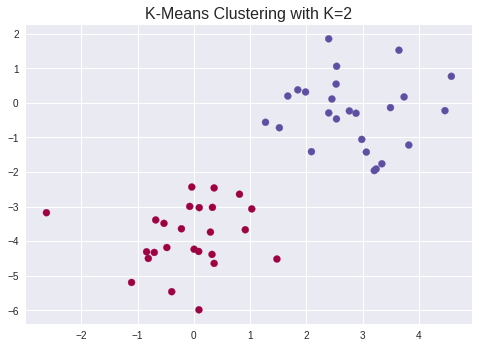

In [5]:
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='Spectral')
plt.title('K-Means Clustering with K=2', size=16);

In [6]:
kmeans2 = KMeans(n_clusters=3, random_state=42, n_init=20)
kmeans2.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [7]:
kmeans2.cluster_centers_

array([[ 2.60450418,  0.24696837],
       [-0.09155989, -3.87287837],
       [ 3.27858059, -1.37217166]])

In [8]:
kmeans2.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [9]:
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=1)
kmeans3.fit(x)
kmeans4 = KMeans(n_clusters=3, random_state=42, n_init=20)
kmeans4.fit(x)

print('inertia with n_init=1:', kmeans3.inertia_)
print('inertia with n_init=20:', kmeans4.inertia_)

inertia with n_init=1: 63.3756408332
inertia with n_init=20: 62.7373780974


# 10.5.2 Hierarchical Clustering

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram

hc_complete = linkage(x, method='complete')
hc_average = linkage(x, method='average')
hc_single = linkage(x, method='single')

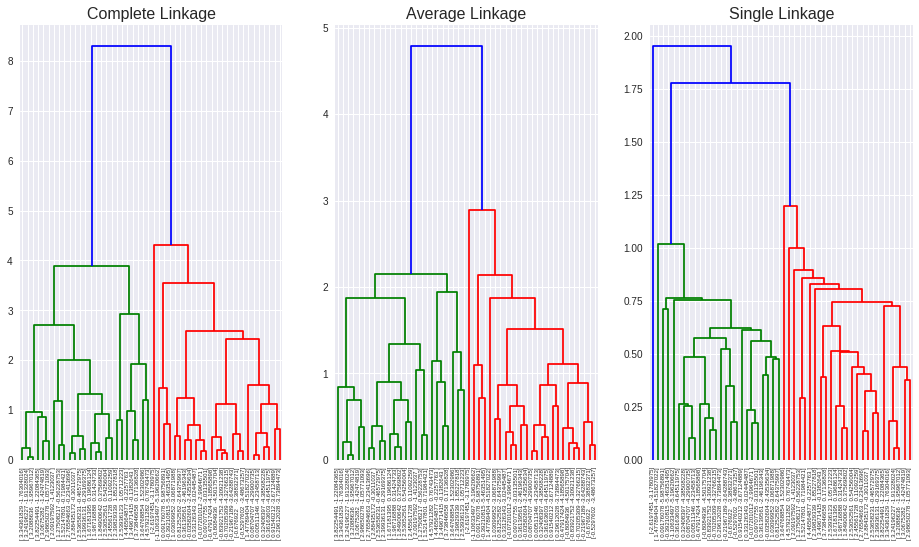

In [11]:
f, axes = plt.subplots(1, 3, sharex=False, sharey=False)

f.set_figheight(8)
f.set_figwidth(16)

dendrogram(hc_complete,
           labels=x,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[0])

dendrogram(hc_average,
           labels=x,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[1])

dendrogram(hc_single,
           labels=x,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[2])

axes[0].set_title('Complete Linkage', size=16)
axes[1].set_title('Average Linkage', size=16)
axes[2].set_title('Single Linkage', size=16);

In [12]:
from scipy.cluster.hierarchy import fcluster, cut_tree

In [13]:
cut_tree(hc_complete, 2).ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [14]:
cut_tree(hc_average, 2).ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [15]:
cut_tree(hc_single, 2).ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [16]:
cut_tree(hc_single, 4).ravel()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

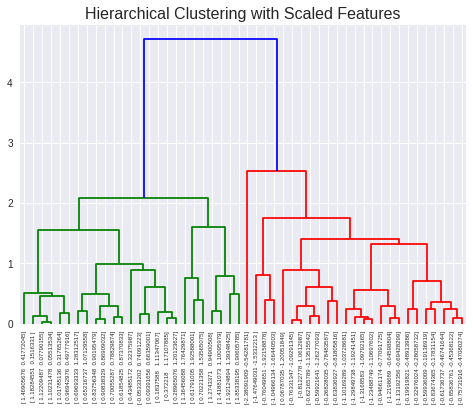

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

dendrogram(linkage(x_scaled, method='complete'),
           labels=x_scaled,
           leaf_rotation=90,
           leaf_font_size=6)

plt.title('Hierarchical Clustering with Scaled Features', size=16);

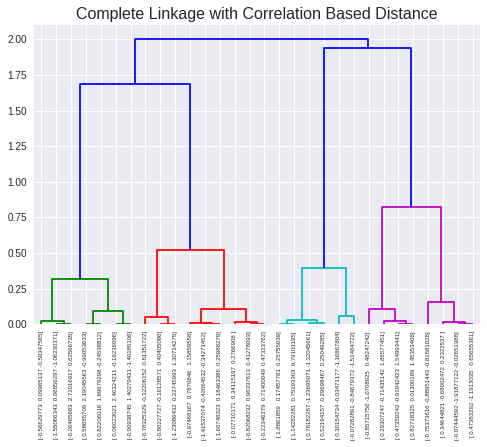

In [18]:
x = np.random.normal(size=30*3).reshape(30, 3)

# scipy linkage takes care of the distance function pdist
dendrogram(linkage(x, method='complete', metric='correlation'),
           labels=x,
           leaf_rotation=90,
           leaf_font_size=6)

plt.title('Complete Linkage with Correlation Based Distance', size=16);